In [12]:
from pulp import LpProblem, LpVariable, lpSum, LpMinimize, LpInteger, value
import random

# Number of tasks
num_tasks = 25

# Randomly generated durations for each task (between 1 to 5 days)
durations = {f"Task {i+1}": random.randint(1, 5) for i in range(num_tasks)}

# Defined dependencies
dependencies = {
    "Task 1": ["Task 3", "Task 4"],
    "Task 2": ["Task 4", "Task 5"],
    "Task 3": ["Task 6"],
    "Task 4": ["Task 7", "Task 8"],
    "Task 5": ["Task 9"],
    "Task 6": ["Task 10", "Task 11"],
    "Task 7": ["Task 12"],
    "Task 8": ["Task 13", "Task 14"],
    "Task 9": ["Task 14", "Task 15"],
    "Task 10": ["Task 16"],
    "Task 11": ["Task 17"],
    "Task 12": ["Task 18"],
    "Task 13": ["Task 19"],
    "Task 14": ["Task 20"],
    "Task 15": ["Task 21"],
    "Task 16": ["Task 22"],
    "Task 17": ["Task 23"],
    "Task 18": ["Task 24"],
    "Task 19": ["Task 25"],
    "Task 20": [],
    "Task 21": [],
    "Task 22": [],
    "Task 23": [],
    "Task 24": [],
    "Task 25": []
}

# Define the linear programming problem
problem = LpProblem("CriticalPathMethod", LpMinimize)

# A large upper bound for the start times
upper_bound = sum(durations.values())

# Variables for start times of each task
start_times = LpVariable.dicts("Start", durations, 0, upper_bound, LpInteger)

# Objective function: Minimize the end time of the last task
problem += lpSum([start_times[task] + durations[task] for task in durations]), "Minimize Project Duration"

# Constraints
for task in durations:
    for successor in dependencies[task]:
        # Successor cannot start before the task finishes
        problem += start_times[successor] >= start_times[task] + durations[task]

# Solve the problem
problem.solve()

# Results
results = {task: start_times[task].varValue for task in durations}
project_duration = value(problem.objective)

# Output results and project duration
results, project_duration

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/stephensapol/miniforge3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/5x/8pkqcwt96xvfghxl2rdd1h1r0000gn/T/686543a9ee33461e935d41e5c4eaa30b-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/5x/8pkqcwt96xvfghxl2rdd1h1r0000gn/T/686543a9ee33461e935d41e5c4eaa30b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 30 COLUMNS
At line 156 RHS
At line 182 BOUNDS
At line 208 ENDATA
Problem MODEL has 25 rows, 25 columns and 50 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 286 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from 286 to -1.79769e+308
Probing was tried 0 times and created 0 cuts of which 0 we

({'Task 1': 0.0,
  'Task 2': 0.0,
  'Task 3': 5.0,
  'Task 4': 5.0,
  'Task 5': 5.0,
  'Task 6': 9.0,
  'Task 7': 9.0,
  'Task 8': 9.0,
  'Task 9': 9.0,
  'Task 10': 11.0,
  'Task 11': 11.0,
  'Task 12': 11.0,
  'Task 13': 14.0,
  'Task 14': 14.0,
  'Task 15': 12.0,
  'Task 16': 16.0,
  'Task 17': 15.0,
  'Task 18': 13.0,
  'Task 19': 15.0,
  'Task 20': 15.0,
  'Task 21': 16.0,
  'Task 22': 18.0,
  'Task 23': 19.0,
  'Task 24': 17.0,
  'Task 25': 18.0},
 366.0)

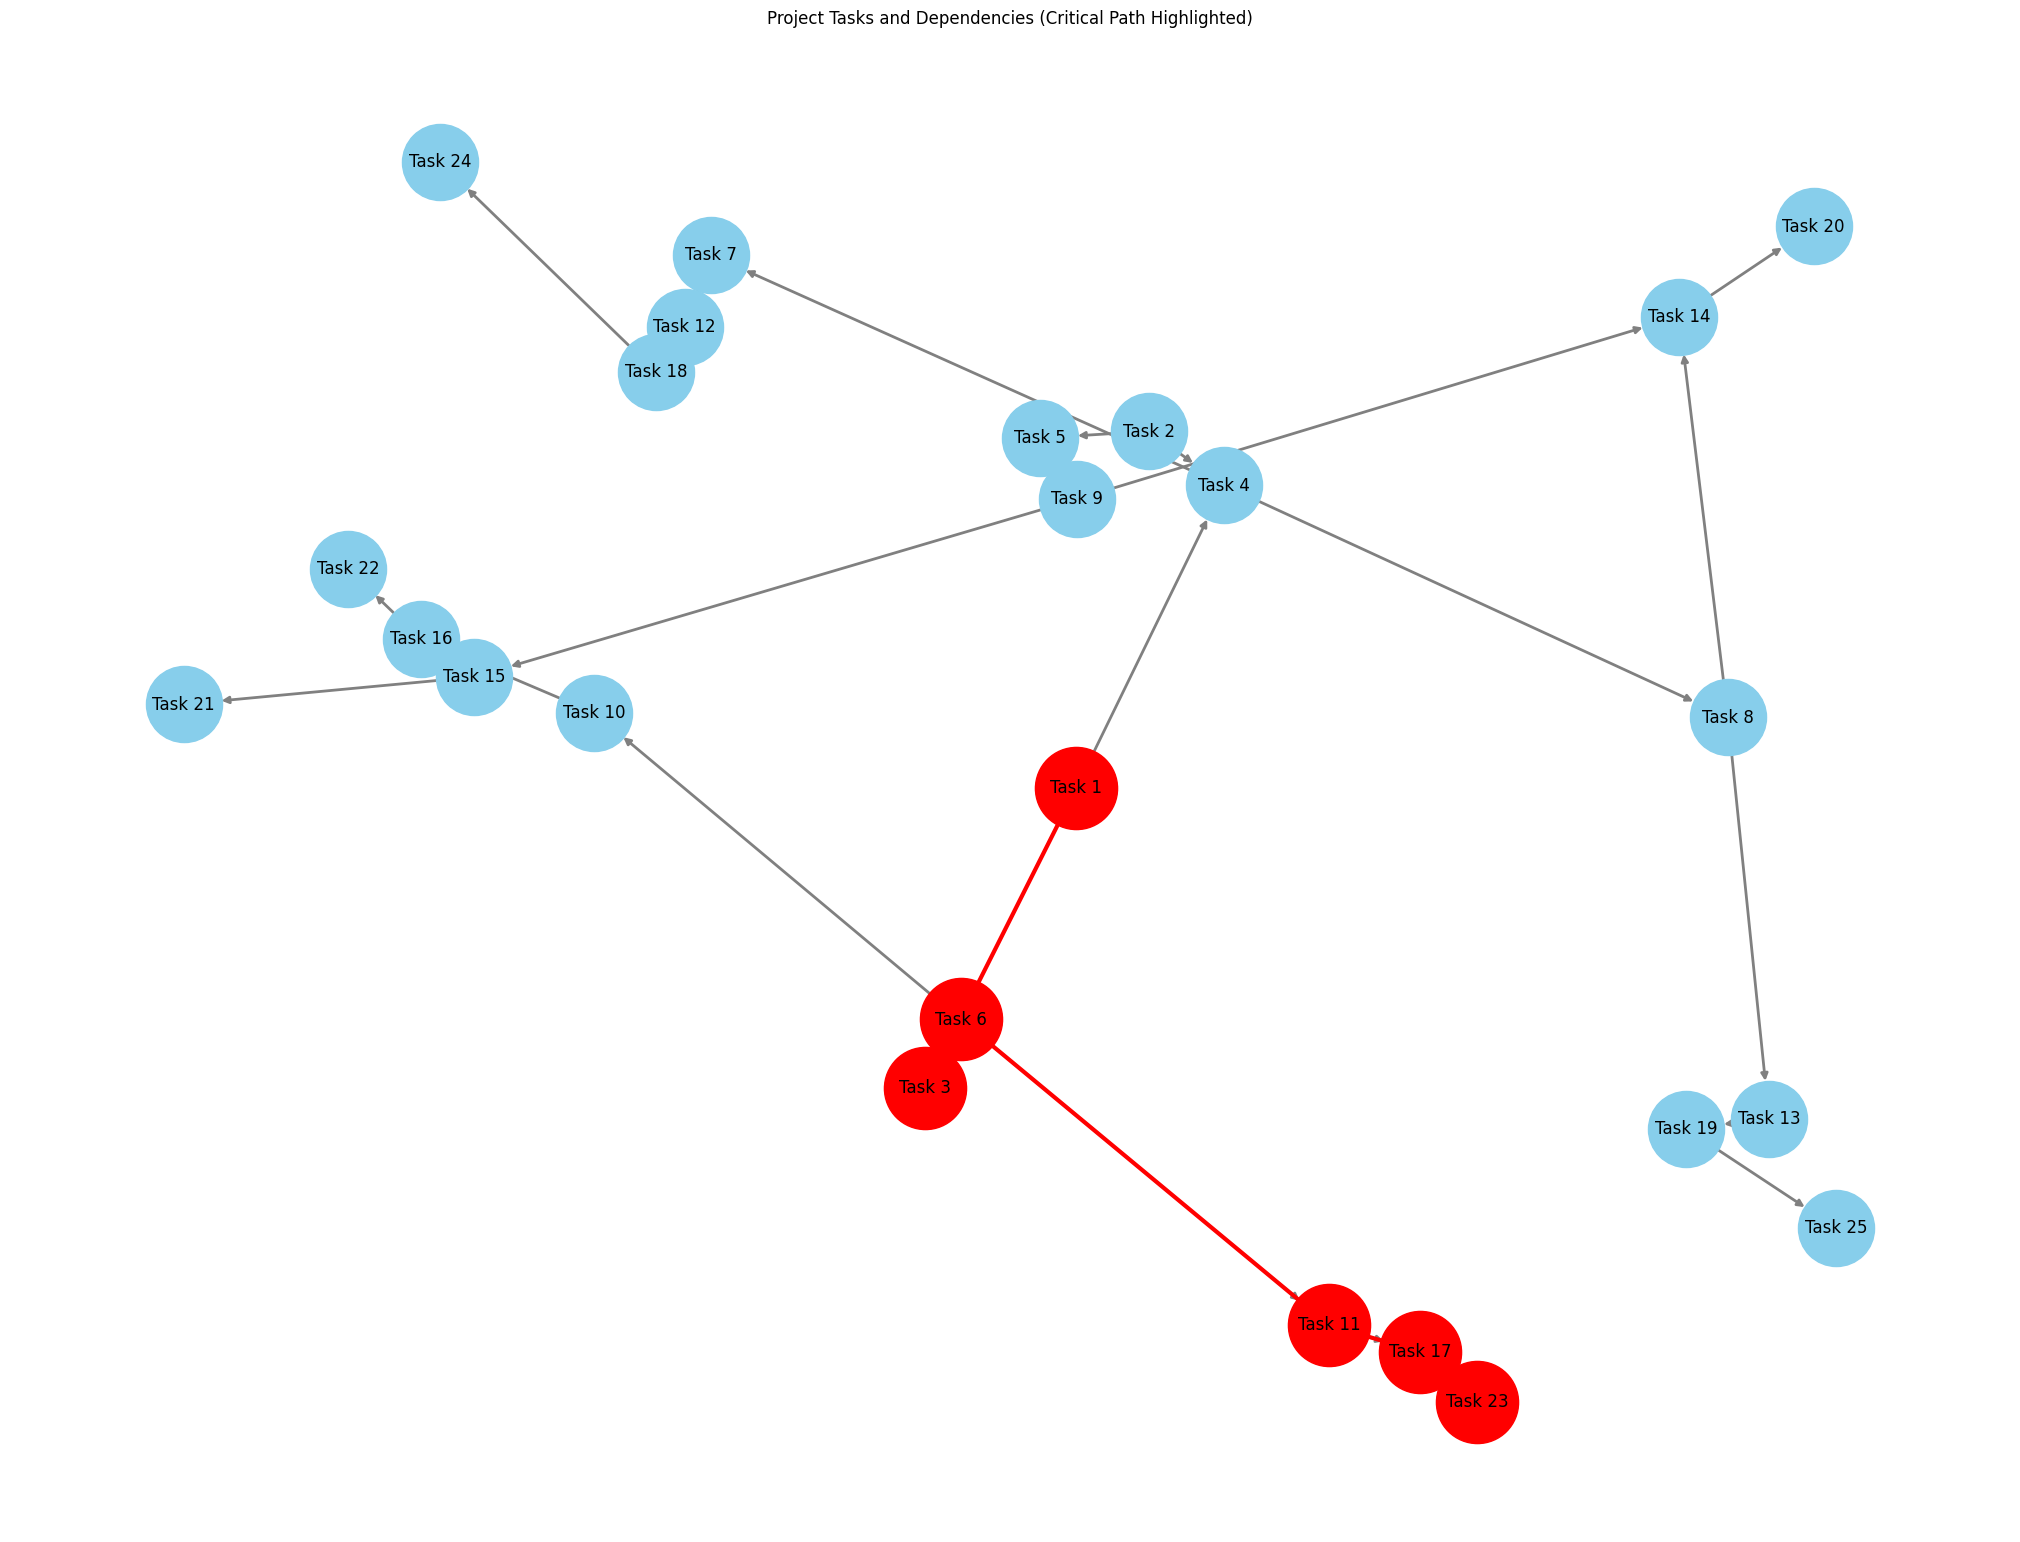

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
# Calculate finish times for each task
finish_times = {task: results[task] + durations[task] for task in results}

# Function to find the critical path
def find_critical_path():
    critical_path = []
    current_task = max(finish_times, key=finish_times.get)  # Start from the task that finishes last

    while current_task:
        critical_path.append(current_task)
        predecessors = [t for t in dependencies.keys() if current_task in dependencies[t]]
        if not predecessors:
            break
        # Find the predecessor with the latest finish time
        current_task = max(predecessors, key=lambda t: finish_times[t])

    return critical_path[::-1]  # Reverse to get the path from start to finish

# Identify the critical path
critical_path = find_critical_path()

# Highlighting the critical path in the diagram
plt.figure(figsize=(20, 15))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, edge_color='gray', width=2, font_size=12)

# Highlight the critical path in red
path_edges = list(zip(critical_path, critical_path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)
nx.draw_networkx_nodes(G, pos, nodelist=critical_path, node_color='red', node_size=3500)

plt.title("Project Tasks and Dependencies (Critical Path Highlighted)")
plt.show()
